Determination of Average Quantities
=============================

In this Jupyter Notebook...

* Analyze the behavior of a user-defined distribution (sum of Gaussians)

* Determine the distribution for the sample mean (with user-defined number of experiments)

* Demonstrate the limiting behavior of the distribution in comparison with the central limit theorem

Import the necessary modules

In [1]:
import numpy as np
import sys
sys.path.append('../')
import matplotlib.pyplot as plt
#import chemeng177.average_quantities as aq

Define a model probability density function as a sum of Gaussians

In [2]:
def generate_prob_array(num_pts=101, x_range=np.array([0, 100]), mu=np.array([50]),
                        sigma=np.array([10]), weight=np.array([1])):
    r"""
    Generate an array of probabilities based on distribution with user-defined number of
    Gaussian distributions

    Parameters
    ----------
    num_pts : int
        Number of points in the distribution
    x_range : float array, length 2
        minimum and maximum values of x
    mu : float array, length = number of peaks
        Mean values of the peaks
    sigma : float array, length = number of peaks
        Standard deviation of the peaks
    weight : float array, length = number of peaks
        Relative weight of the peaks (normalization not necessary)

    Returns
    -------
    x : float array (length = num_pts)
        Position of the x-values for the distribution
    prob : float array (length = num_pts)
        Probability at each x position

    """

    # Normalize the weights of the Gaussians
    weight = weight / np.sum(weight)

    # Generate the probability array
    prob = np.zeros(num_pts)
    x = np.linspace(x_range[0], x_range[1], num_pts)
    for i_gauss in range(len(mu)):
        prob += weight[i_gauss] * 1 / np.sqrt(2 * np.pi) / sigma[i_gauss] * \
                np.exp(- (x - mu[i_gauss]) ** 2 / (2 * sigma[i_gauss] ** 2))

    # Normalize the probabilities
    prob = prob / np.sum(prob)

    return x, prob


Generate an example distribution using the default values

In [3]:
x, prob_x = generate_prob_array()

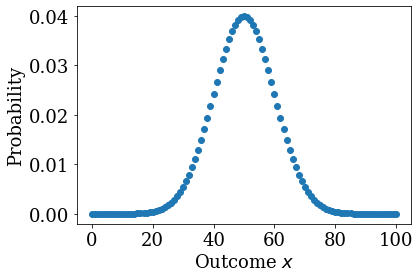

In [4]:
plt.figure ()
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

plt.scatter(x, prob_x)

plt.xlabel('Outcome $x$')
plt.ylabel('Probability')

plt.show()

Calculate the mean and variance of the distribution

In [5]:
mu_x = np.sum(x * prob_x)
sigma_x = np.sqrt(np.sum(x ** 2 * prob_x) - np.sum(x * prob_x) ** 2)

In [6]:
print(mu_x)
print(sigma_x)

50.0
9.999942145653804


Generate histogram of realizations of the sample mean for varying number of experiments

In [7]:
num_exp = 10
num_realizations = 10000

num_pts = len(prob_x)

y = np.array([])
for i_exp in range(num_realizations):
    y = np.append(y, np.mean(np.random.choice(num_pts, num_exp, p=prob_x)))

In [8]:
delta_x = x[1] - x[0]
x_bin = np.append(x,x[-1] + delta_x) - delta_x / 2
prob_y, x_bin = np.histogram(y, bins=x_bin, density = True)

sigma_y = sigma_x / np.sqrt(num_exp)
prob_y_gauss = 1 / np.sqrt(2 * np.pi) / sigma_y * np.exp(- (x - mu_x) ** 2 / (2 * sigma_y ** 2))

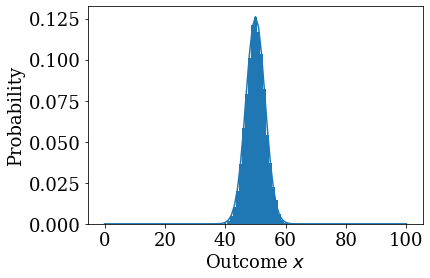

In [9]:
plt.figure()
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

plt.plot(x, prob_y_gauss)
plt.bar(x, prob_y)

plt.xlabel('Outcome $x$')
plt.ylabel('Probability')

plt.show()

Perform the analysis for two peaks of equal weight

In [10]:
num_pts=101
x_range=np.array([0, 100])
mu=np.array([33, 67])
sigma=np.array([4, 4])
weight=np.array([1, 1])

x, prob_x = generate_prob_array(num_pts, x_range, mu, sigma, weight)

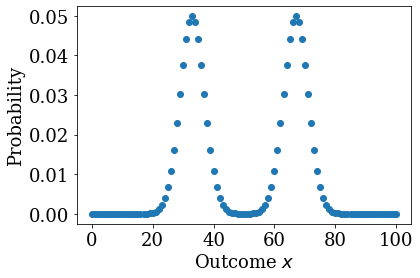

In [11]:
plt.figure()
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

plt.scatter(x, prob_x)

plt.xlabel('Outcome $x$')
plt.ylabel('Probability')

plt.show()

Calculate the mean and variance of the distribution

In [12]:
mu_x = np.sum(x * prob_x)
sigma_x = np.sqrt(np.sum(x ** 2 * prob_x) - np.sum(x * prob_x) ** 2)

Generate histogram of realizations of the sample mean for varying number of experiments

In [13]:
num_exp = 3
num_realizations = 10000

num_pts = len(prob_x)

y = np.array([])
for i_exp in range(num_realizations):
    y = np.append(y, np.mean(np.random.choice(num_pts, num_exp, p=prob_x)))

delta_x = x[1] - x[0]
x_bin = np.append(x,x[-1] + delta_x) - delta_x / 2
prob_y, x_bin = np.histogram(y, bins=x_bin, density = True)

sigma_y = sigma_x / np.sqrt(num_exp)
prob_y_gauss = 1 / np.sqrt(2 * np.pi) / sigma_y * np.exp(- (x - mu_x) ** 2 / (2 * sigma_y ** 2))



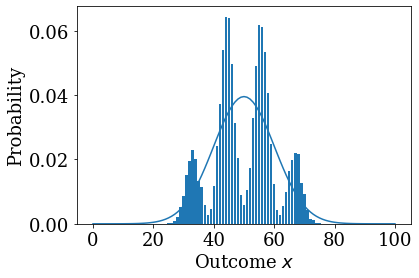

In [14]:
plt.figure()
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

plt.plot(x, prob_y_gauss)
plt.bar(x, prob_y)

plt.xlabel('Outcome $x$')
plt.ylabel('Probability')

plt.show()

Perform the analysis for two peaks of unequal weight

In [15]:
num_pts=101
x_range=np.array([0, 100])
mu=np.array([33, 67])
sigma=np.array([4, 4])
weight=np.array([3, 1])

x, prob_x = generate_prob_array(num_pts, x_range, mu, sigma, weight)

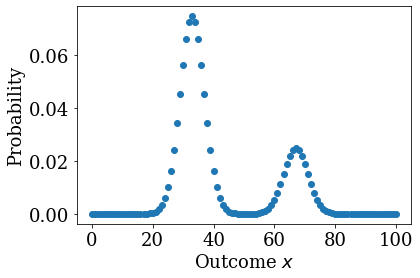

In [16]:
plt.figure()
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

plt.scatter(x, prob_x)

plt.xlabel('Outcome $x$')
plt.ylabel('Probability')

plt.show()

Calculate the mean and variance of the distribution

In [17]:
mu_x = np.sum(x * prob_x)
sigma_x = np.sqrt(np.sum(x ** 2 * prob_x) - np.sum(x * prob_x) ** 2)

Generate histogram of realizations of the sample mean for varying number of experiments

In [18]:
num_exp = 5
num_realizations = 10000

num_pts = len(prob_x)

y = np.array([])
for i_exp in range(num_realizations):
    y = np.append(y, np.mean(np.random.choice(num_pts, num_exp, p=prob_x)))

delta_x = x[1] - x[0]
x_bin = np.append(x,x[-1] + delta_x) - delta_x / 2
prob_y, x_bin = np.histogram(y, bins=x_bin, density = True)

sigma_y = sigma_x / np.sqrt(num_exp)
prob_y_gauss = 1 / np.sqrt(2 * np.pi) / sigma_y * np.exp(- (x - mu_x) ** 2 / (2 * sigma_y ** 2))

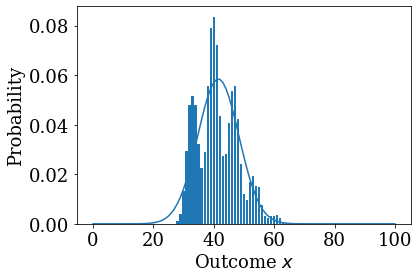

In [19]:
plt.figure()
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

plt.plot(x, prob_y_gauss)
plt.bar(x, prob_y)

plt.xlabel('Outcome $x$')
plt.ylabel('Probability')

plt.show()